In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Plot customization

## Line-width

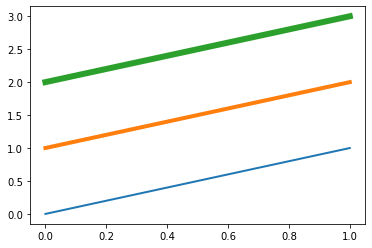

In [2]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linewidth=2)
ax.plot([0, 1], [1, 2], linewidth=4)
ax.plot([0, 1], [2, 3], linewidth=6)
plt.show()

## Line-styles

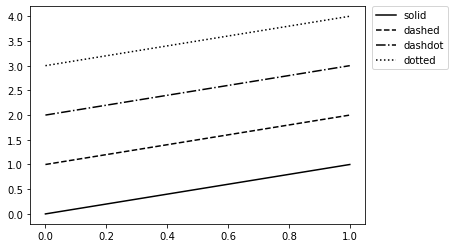

In [3]:
fig, ax = plt.subplots()

linestyles = {
    "solid": "-",
    "dashed": "--",
    "dashdot": "-.",
    "dotted": ".",
}

for i, (desc, style) in enumerate(linestyles.items()):
    ax.plot([0, 1], [i, i + 1], color="black", linestyle=desc, label=desc)
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

### Create custom line styles

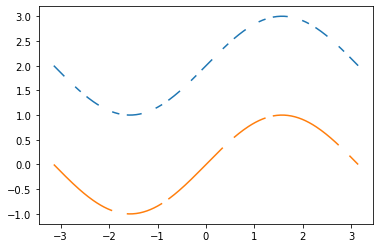

In [4]:
n = 256
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(X)

fig, ax = plt.subplots()
ax.plot(X, Y + 2, linestyle=(0, (10, 10, 5, 5)))  # offset, (on, off, ..)
ax.plot(X, Y, linestyle=(0, (50, 10, 25, 5)))
plt.show()

## Color

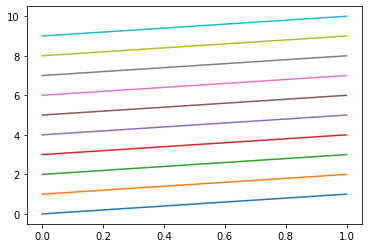

In [5]:
# By default, matplotlib cycles through 10 colors when creating plots

fig, ax = plt.subplots()
for i in range(10):
    ax.plot([0, 1], [i, i + 1])
plt.show()

### Color cycle

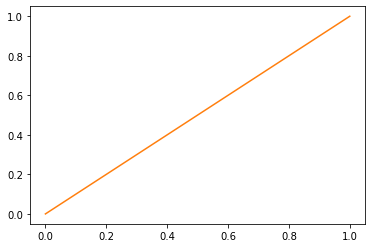

In [6]:
# To explicitly use colors of the standard color cycle
# you can pass the shortcut C0 - C9 as a string

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color="C1")
plt.show()

### Grayscale

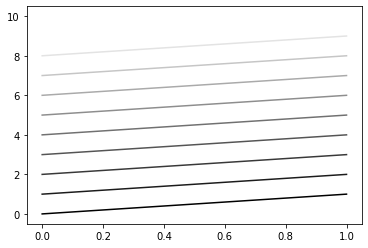

In [7]:
# Grayscale values: Use a string representation of a number between 0 and 1

fig, ax = plt.subplots()
for i in range(10):
    ax.plot([0, 1], [i, i + 1], color=f"{i / 9}")
plt.show()

### RGB

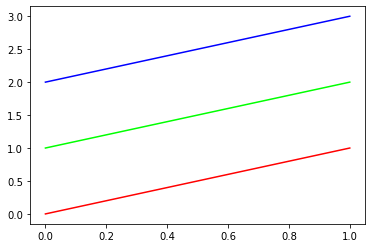

In [8]:
# RGB values
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color=(1, 0, 0))
ax.plot([0, 1], [1, 2], color=(0, 1, 0))
ax.plot([0, 1], [2, 3], color=(0, 0, 1))
plt.show()

### RGBA 

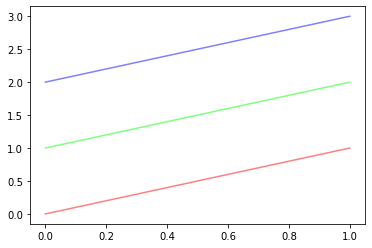

In [9]:
# RGBA values
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color=(1, 0, 0, 0.5))
ax.plot([0, 1], [1, 2], color=(0, 1, 0, 0.5))
ax.plot([0, 1], [2, 3], color=(0, 0, 1, 0.5))
plt.show()

### Alpha

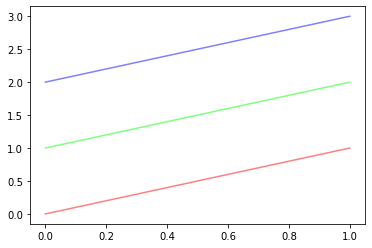

In [10]:
# RGB + alpha arg
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color=(1, 0, 0), alpha=0.5)
ax.plot([0, 1], [1, 2], color=(0, 1, 0), alpha=0.5)
ax.plot([0, 1], [2, 3], color=(0, 0, 1), alpha=0.5)
plt.show()

## Markers

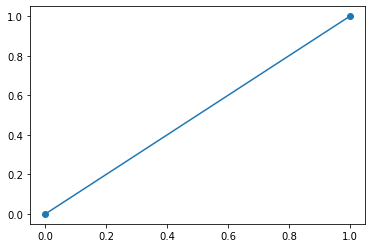

In [11]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], marker="o")
plt.show()

In [12]:
text_style = {
    "horizontalalignment": "right",
    "verticalalignment": "center",
    "fontsize": 17,
    "fontdict": {"family": "monospace"},
}

marker_style = {
    "linestyle": ":",
    "color": "0.8",
    "markersize": 15,
    "mfc": "C0",
    "mec": "C0",
}

filled_markers = mpl.lines.Line2D.filled_markers

unfilled_markers = [
    m
    for m, func in mpl.lines.Line2D.markers.items()
    if func != "nothing" and m not in filled_markers
]

filled_markers = (*filled_markers, None)
filled_markers = np.array(filled_markers, dtype="object").reshape(2, -1)
unfilled_markers = np.array(unfilled_markers, dtype="object").reshape(2, -1)

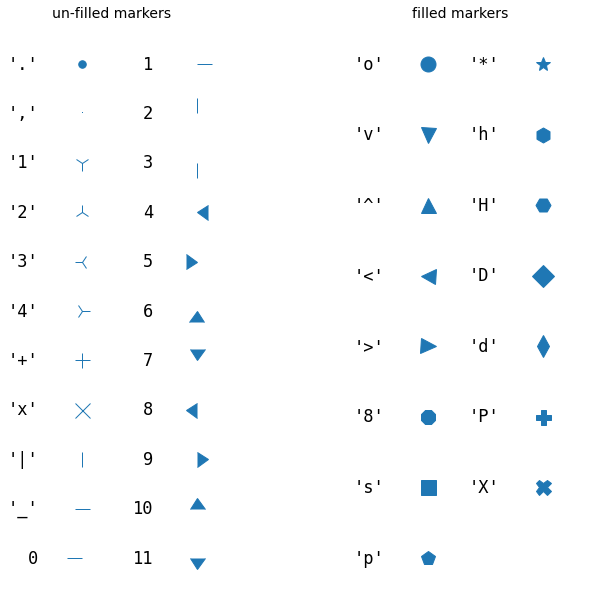

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
fig.text(x=0.15, y=0.91, s="un-filled markers", fontsize=14)
fig.text(x=0.65, y=0.91, s="filled markers", fontsize=14)

for col, ax in enumerate(axes[0:2]):
    for y, marker in enumerate(unfilled_markers[col, :]):
        ax.text(-0.05, y, repr(marker), **text_style)
        ax.plot(0, y, marker=marker, **marker_style)
    ax.set_axis_off()
    ax.invert_yaxis()

axes[2].set_axis_off()

# fig.suptitle('filled markers', y=0.91, fontsize=14)
for col, ax in enumerate(axes[3:]):
    for y, marker in enumerate(filled_markers[col, :]):
        if marker != None:
            ax.text(-0.05, y, repr(marker), **text_style)
        ax.plot(0, y, marker=marker, **marker_style)
    ax.set_axis_off()
    ax.invert_yaxis()
plt.show()

### Fill-styles

In [14]:
text_style = {
    "horizontalalignment": "center",
    "verticalalignment": "center",
    "fontsize": 15,
    "fontdict": {"family": "monospace"},
}

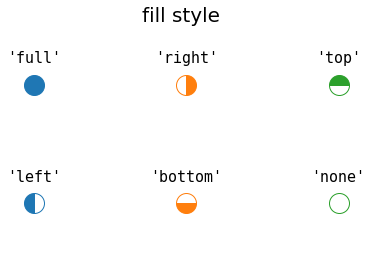

In [15]:
fill_styles = np.array(("full", "left", "right", "bottom", "top", "none")).reshape(-1, 2)

fig, axs = plt.subplots(2, 1)
fig.suptitle("fill style", fontsize=20)

for row, ax in enumerate(axs):
    for x, fill_style in enumerate(fill_styles[:, row]):
        ax.text(x, 1.03, repr(fill_style), **text_style)
        ax.plot(x, 1, marker="o", fillstyle=fill_style, markersize=20)
    ax.set_axis_off()
plt.show()

### Custom markers

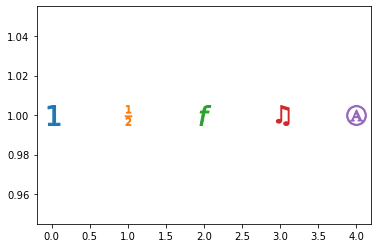

In [16]:
fig, ax = plt.subplots()
markers = [
    r"$1$",
    r"$\frac{1}{2}$",
    r"$f$",
    "$\u266B$",
    "$\u24b6$",
]

for y, marker in enumerate(markers):
    ax.plot(y, 1, marker=marker, markersize=20)
plt.show()

## Property Cycles

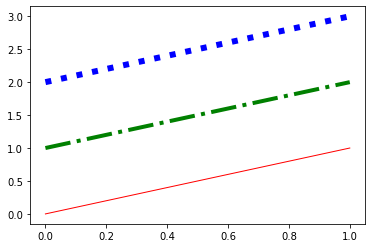

In [17]:
# Custom cyclers
from matplotlib.rcsetup import cycler

prop_cycle = (
    cycler("color", ["red", "green", "blue"])
    + cycler("lw", [1, 4, 6])
    + cycler("linestyle", ["-", "-.", ":"])
)

# Temporary change
with plt.rc_context({"axes.prop_cycle": prop_cycle}):
    fig, ax = plt.subplots()
    for i in range(3):
        ax.plot([0, 1], [i, i + 1])
    plt.show()

## Color maps

### Perceptually uniform

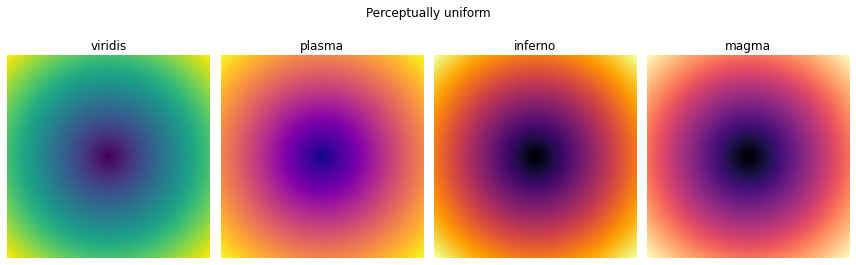

In [18]:
n = 256
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)

cmaps = ["viridis", "plasma", "inferno", "magma"]

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle("Perceptually uniform")
for ax, cmap in zip(axs, cmaps):
    ax.imshow(Z, cmap=cmap)
    ax.set_title(cmap)
    ax.set_axis_off()
fig.tight_layout()
plt.show()

### Sequential

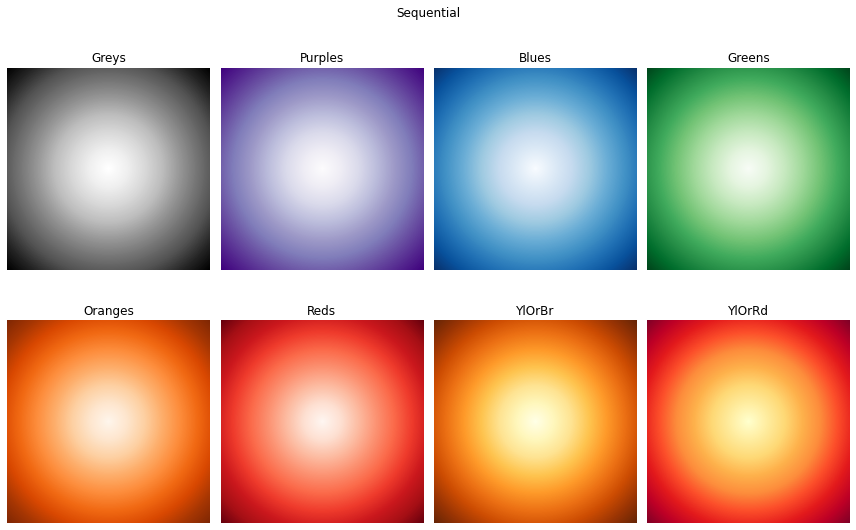

In [19]:
n = 256
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)

cmaps = ["Greys", "Purples", "Blues", "Greens", "Oranges", "Reds", "YlOrBr", "YlOrRd"]

fig, axs = plt.subplots(2, 4, figsize=(12, 8))
fig.suptitle("Sequential")
for ax, cmap in zip(axs.flatten(), cmaps):
    ax.imshow(Z, cmap=cmap)
    ax.set_title(cmap)
    ax.set_axis_off()
fig.tight_layout()
plt.show()

### Diverging

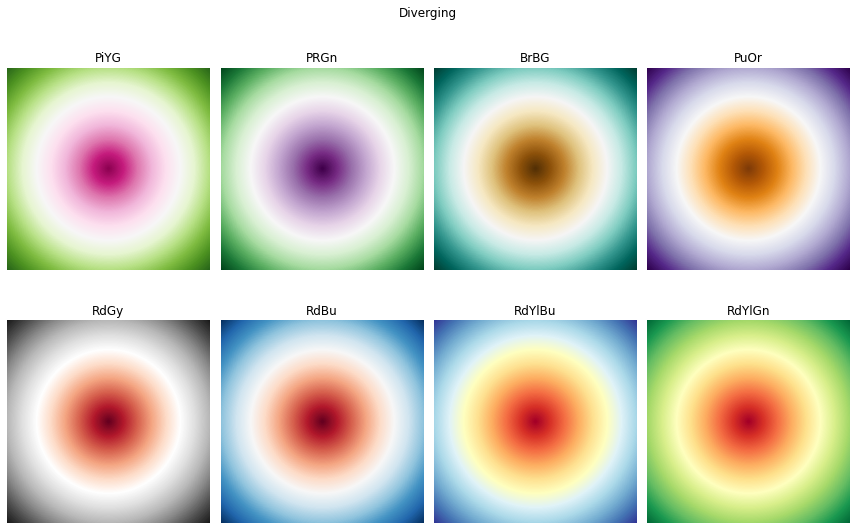

In [20]:
n = 256
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)

cmaps = ["PiYG", "PRGn", "BrBG", "PuOr", "RdGy", "RdBu", "RdYlBu", "RdYlGn"]

fig, axs = plt.subplots(2, 4, figsize=(12, 8))
fig.suptitle("Diverging")
for ax, cmap in zip(axs.flatten(), cmaps):
    ax.imshow(Z, cmap=cmap)
    ax.set_title(cmap)
    ax.set_axis_off()
fig.tight_layout()
plt.show()

### Qualitative

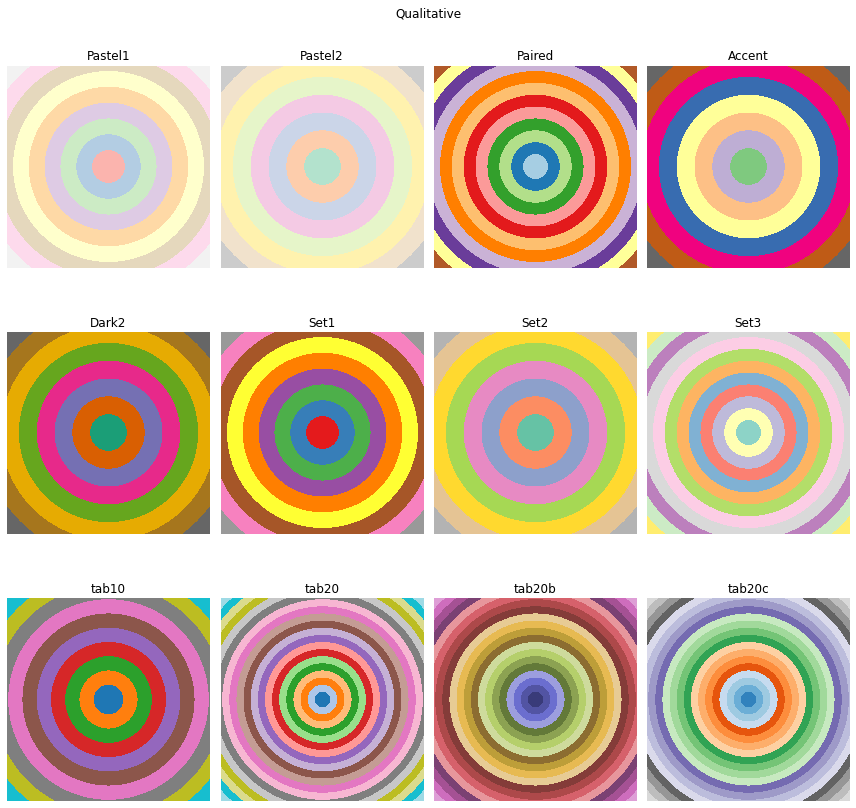

In [21]:
n = 256
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)

cmaps = [
    "Pastel1",
    "Pastel2",
    "Paired",
    "Accent",
    "Dark2",
    "Set1",
    "Set2",
    "Set3",
    "tab10",
    "tab20",
    "tab20b",
    "tab20c",
]

fig, axs = plt.subplots(3, 4, figsize=(12, 12))
fig.suptitle("Qualitative")
for ax, cmap in zip(axs.flatten(), cmaps):
    ax.imshow(Z, cmap=cmap)
    ax.set_title(cmap)
    ax.set_axis_off()
fig.tight_layout()
plt.show()

## Color bars

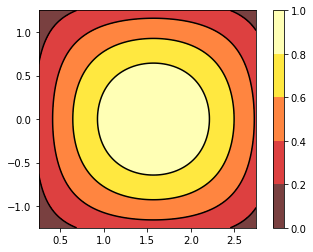

In [22]:
n = 256
x = np.linspace(0.25, 2.75, n)
y = np.linspace(-1.25, 1.25, n)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig, ax = plt.subplots()
ctf = ax.contourf(X, Y, Z, levels=4, alpha=0.75, cmap="hot")
ax.contour(X, Y, Z, 4, colors="black")
ax.set_aspect(1)

fig.colorbar(ctf)
plt.show()

### Guaranteed same height as plot

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


def colorbar(ax, mappable, size=0.05, pad=0.05):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=f"{size * 100}%", pad=pad)
    return fig.colorbar(mappable, cax=cax)

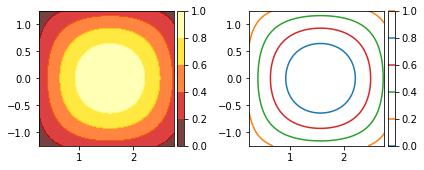

In [24]:
n = 256
x = np.linspace(0.25, 2.75, n)
y = np.linspace(-1.25, 1.25, n)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig, (ax1, ax2) = plt.subplots(1, 2)

ctf1 = ax1.contourf(
    X,
    Y,
    Z,
    levels=4,
    alpha=0.75,
    cmap="hot",
)

ctf2 = ax2.contour(X, Y, Z, levels=4, colors=["C0", "C1", "C2", "C3"])

ax1.set_aspect(1)
ax2.set_aspect(1)

colorbar(ax1, ctf1)
colorbar(ax2, ctf2)
fig.tight_layout()
plt.show()

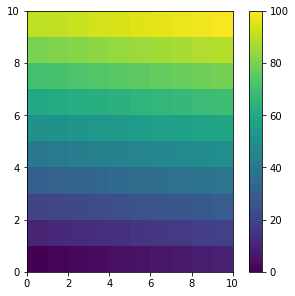

In [25]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

# https://matplotlib.org/3.1.3/tutorials/intermediate/constrainedlayout_guide.html

arr = np.arange(100).reshape((10, 10))
norm = mcolors.Normalize(vmin=0.0, vmax=100.0)
# see note above: this makes all pcolormesh calls consistent:
pc_kwargs = {"rasterized": True, "cmap": "viridis", "norm": norm}
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)
im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=ax)
plt.show()

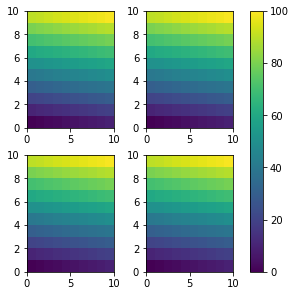

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs)
plt.show()

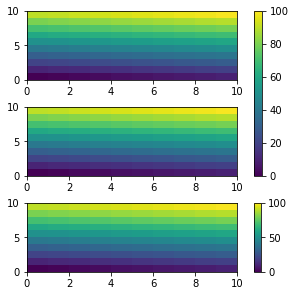

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(4, 4), constrained_layout=True)
for ax in axs[:2]:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs[:2])
im = axs[2].pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=[axs[2]], aspect=10)
plt.show()

## Annotations

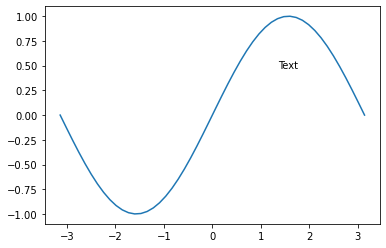

In [28]:
x = np.linspace(-np.pi, np.pi)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.annotate("Text", (np.pi / 2, 0.5), ha="center", va="center")  # In data coordinates
plt.show()

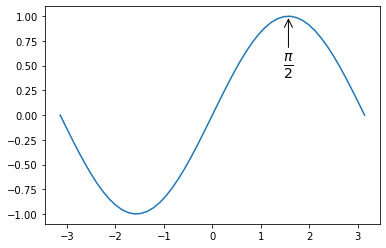

In [29]:
x = np.linspace(-np.pi, np.pi)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.annotate(
    r"$\frac{\pi}{2}$",
    (np.pi / 2, np.sin(np.pi / 2)),
    xytext=(np.pi / 2, 0.5),
    arrowprops={"arrowstyle": "->"},  # arrow kwargs
    **{"fontsize": 20, "va": "center", "ha": "center"},  # Text kwargs
)  # In data coordinates
plt.show()

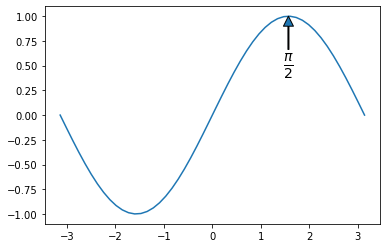

In [30]:
x = np.linspace(-np.pi, np.pi)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.annotate(
    r"$\frac{\pi}{2}$",
    (np.pi / 2, np.sin(np.pi / 2)),
    xytext=(np.pi / 2, 0.5),
    arrowprops={"width": 1, "headwidth": 10, "headlength": 10},  # arrow kwargs
    **{"fontsize": 20, "va": "center", "ha": "center"},  # Text kwargs
)  # In data coordinates
plt.show()

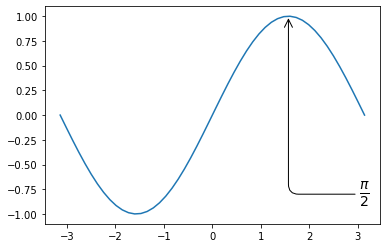

In [31]:
import matplotlib.patches

con = matplotlib.patches.ConnectionStyle.Angle(angleA=0, angleB=90, rad=10)
# con = matplotlib.patches.ConnectionStyle.Arc3(rad=-0.5)

x = np.linspace(-np.pi, np.pi)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.annotate(
    r"$\frac{\pi}{2}$",
    (np.pi / 2, np.sin(np.pi / 2)),
    xytext=(np.pi, -0.8),
    arrowprops={"arrowstyle": "->", "connectionstyle": con},  # arrow kwargs
    **{"fontsize": 20, "va": "center", "ha": "center"},  # Text kwargs
)  # In data coordinates
plt.show()